# 5. Frame Selected Stability

In [55]:
from src import *

In [56]:
from sklearn.linear_model import LinearRegression

D = lambda x,y: ((x-y)**2).sum(axis=1)

## Description

We look in this section for the stability of frame selected gradients across subjects (individual gradients approach) and also how stable the group gradients are when frame selecting compared to when full is used. 

GOAL: Evaluate differences of individual gradients of selected gradients and movie long gradients + evaluate differences of group gradients of selected timeseries and group gradients of full movies 

## Table of Contents
- [Frame selected (by discrete emotion timecourses) gradients](#discreteemo)
- [Frame selected (by combined 3FA timecourses) gradients](#comb3fa)
- [Frame selected (by 3FA timecourses) gradients](#3fa)
- [Frame selected (by pareto 3FA timecourses) gradients](#pareto3fa)

<a class="anchor" id="discreteemo"></a>
## Frame selected (by discrete emotion timecourses) gradients

In [57]:
# In-Tervals percentages
s5 = [(s,s+5) for s in range(0,101,5) if (s+5 <= 100)]
s10 = [(s,s+10) for s in range(0,101,10) if (s+10 <= 100)]
s20 = [(s,s+20) for s in range(0,101,20) if (s+20 <= 100)]
s25 = [(s,s+25) for s in range(0,101,25) if (s+25 <= 100)]
s33 = [(0,33), (33,66), (66,100)]
s50 = [(0,50), (50,100)]

### Gradients Computation

In [6]:
# Params
embedding  = "dm" # diffusion map
aff_kernel = "pearson" #affinity matrix kernel
align_meth = "procrustes"
n_iter     = 10 # procrustes align number of iteration
nb_comp    = 3
rs         = 99

threshed_series = load('./resources/treshed_series.pkl')

1. Frame selection compute

In [5]:
# for i in range(4):
#     # individual variance variables
#     fselect_subjects_gradients = {}
    
#     threshed = threshed_series[i]
#     for rng in tqdm(threshed.keys()):
#         selected_series = threshed[rng]

#         # concatenate on different frames across movies
#         # basically doing reordering of columns
#         tmp = next(iter(selected_series))
#         subject_numbers = list(selected_series[tmp].keys())
#         subject_tmpseries = {_id:[] for _id in subject_numbers}

#         for mname in selected_series:
#             if len(selected_series[mname]) == 0: continue
#             for _id in subject_numbers:
#                 subject_tmpseries[_id].append(selected_series[mname][_id])

#         subject_series = []
#         for _id in subject_numbers:
#             subject_series.append(np.concatenate(subject_tmpseries[_id]))

#         # if concatenated length not long enough then skip whole process
#         if len(subject_series[0]) < 15: 
#             fselect_subjects_gradients[rng] = []
#             continue

#         # Compute individual gradients according to selected frames
#         subjects_gradients = []
#         for nsub in range(len(subject_numbers)):
#             tmp_series = np.asarray(subject_series)[nsub]
#             fc_selects = FC(tmp_series)
#             g_selects = GradientMaps(n_components=nb_comp, approach=embedding, 
#                                 kernel=aff_kernel, random_state=rs)
#             g_selects.fit(fc_selects)
#             subjects_gradients.append(g_selects.gradients_)

#         # alignement across all gradients
#         select_subjects_gradients,_,s = procrustes_align(np.asarray(subjects_gradients))
#         select_subjects_gradients = np.asarray(select_subjects_gradients)
#         fselect_subjects_gradients[rng] = select_subjects_gradients

#     save('./resources/fselect_subjects_gradients{}.pkl'.format(i), fselect_subjects_gradients)
hide()

2. Compute Null samples of various length

In [6]:
# # Also doing sampling of a given percentage in each series equally 
# # instead of over everything (so we necessarily have balanced per movie length)
# bounds = {5:s5, 10: s10, 20: s20, 25:s25, 33:s33, 50:s50}
# selected_series = load('./data/fmri_414_series.pkl')

# for nullperc in [5,10,20]:
#     TMP = []
#     np.random.seed(19)
    
#     for _ in tqdm(range(200)):
#         normalize_subjects_gradients = {}
            
#         # concatenate on different frames across movies
#         # basically doing reordering of columns
#         tmp = list(selected_series.values())
#         subject_numbers = [l for l in list(tmp[0].keys())]
#         bins = bounds[nullperc]
        
        
#         bound_subject_tmpseries = {boun: {_id:[] for _id in subject_numbers} for boun in bins}

#         for i in range(len(tmp)):
#             if len(tmp[i]) == 0: continue

#             length = tmp[i][subject_numbers[0]].shape[0]
# #             sampleidx = np.random.choice(np.arange(length), 
# #                                      length*nullperc//100, replace=False)  
#             cur_idx = np.arange(length)
#             np.random.shuffle(cur_idx)
            
#             for boun in bins:
#                 for _id in subject_numbers:
#                     lb,rb = boun
#                     lb,rb = int(length * lb/100), int(length * rb/100)
#                     shuffled_series = tmp[i][_id][cur_idx]
#                     bound_subject_tmpseries[boun][_id].append(shuffled_series[lb:rb])

                
#         for boun in bins:
#             subject_tmpseries = bound_subject_tmpseries[boun]
#             subject_series = []
            
#             for _id in subject_numbers:
#                 sample = np.concatenate(subject_tmpseries[_id])
#                 subject_series.append(sample)

#             # Compute individual gradients according to selected frames
#             subjects_gradients = []
#             for nsub in range(len(subject_numbers)):
#                 tmp_series = np.asarray(subject_series)[nsub]
#                 fc_selects = FC(tmp_series)
#                 g_selects = GradientMaps(n_components=nb_comp, approach=embedding, 
#                                     kernel=aff_kernel, random_state=rs)
#                 g_selects.fit(fc_selects)
#                 subjects_gradients.append(g_selects.gradients_)

#             # alignement across all gradients
#             subjects_gradients,_,s = procrustes_align(np.asarray(subjects_gradients))
#             subjects_gradients = np.asarray(subjects_gradients)
#             normalize_subjects_gradients[boun] = subjects_gradients

#         TMP.append(normalize_subjects_gradients)

#     save('./resources/null_grad/sample_bins/nulldistrib_random{}.pkl'.format(nullperc), TMP)

hide()

3. Rest Film Gradients Computation 

In [7]:
# mri_path400 = "./data/fmri414_compiled/"
# mri_df = pd.read_csv(mri_path400 + 'Rest_compiled414.csv')
# front_pad = 0
# end       = -1

# rest_subject_series = []
# rest_subjects_gradients = []
# acqui        = [k for k in mri_df.filename.unique() if '414' in k]

# # Individual gradients computation
# for filename_movie in acqui:
#     tmp_series, _ = df_to_timeseries(mri_df, filename_movie)

#     tmp_series    = tmp_series[front_pad : end]
#     fc = FC(tmp_series)
#     g = GradientMaps(n_components=nb_comp, approach=embedding, 
#                             kernel=aff_kernel, random_state=rs)
#     g.fit(fc)
#     rest_subjects_gradients.append(g.gradients_)    
#     rest_subject_series.append(tmp_series)

# rest_subjects_gradients,_,s = procrustes_align(np.asarray(rest_subjects_gradients))
# rest_subjects_gradients = np.asarray(rest_subjects_gradients)

hide()

### Scoring (sum squares etc...)

In [50]:
fselect_subjects_gradients = load('./resources/fselect_grads/intensity_based_scores/fselect_subjects_gradients1.pkl')

In [51]:
orig_df = {}
null_df = {}
for bounds in tqdm(s20+s25+s33+s50):
    odf = {}
    ndf = {}
    
    lb,rb = bounds
    ssize = str(rb-lb)
    if ssize == '34': ssize='33' # ssizeck fix

    TMP = load('./resources/null_grad/sample_bins/nulldistrib_random{}.pkl'.format(ssize))
    
    A = []
    if ssize == '20':
        n_iter = 100
    else:
        n_iter = 200
    for i in range(n_iter):
        tmp = np.asarray([D(TMP[i][bounds].mean(axis=1)[k],TMP[i][bounds][k]) for k in range(30)])
        A.append(tmp.std(axis=0))

    fscore = np.asarray([D(fselect_subjects_gradients[bounds].mean(axis=1)[k],
              fselect_subjects_gradients[bounds][k]) for k in range(30)])
    
    odf['fullnet'] = fscore.std(axis=0)
    ndf['fullnet'] = A
        
    orig_df[bounds] = odf
    null_df[bounds] = ndf

orig_df = pd.DataFrame.from_records(orig_df)
null_df = pd.DataFrame.from_records(null_df)

  0%|          | 0/14 [00:00<?, ?it/s]

#### Compute slope and locate in null distrib slope

In [52]:
from sklearn.linear_model import LinearRegression

In [55]:
nscores = {B[0][1]-B[0][0]: {} for B in [s20, s25, s33, s50]}
for B in [s20, s25, s33, s50]:
    for net in index2region17.keys():
        subset = np.arange(len(B))
        # subset = [1,2]

        perdf = np.asarray([orig_df[B].iloc[0][k] for k in range(len(orig_df[B].columns))]).T
        nperdf = np.asarray([null_df[B].iloc[0][k] for k in range(len(null_df[B].columns))])
        
        # 1. Compute initial statistic
        y_train = np.concatenate([perdf[index2region17[net]][:,i] - perdf[index2region17[net]].mean(axis=1) 
                                  for i in subset])
        X_train = np.concatenate([index2region17[net].shape[0] * [i] for i in range(len(subset))])

        regressor = LinearRegression()
        regressor.fit(X_train.reshape(-1,1), y_train)
        initial_coef = regressor.coef_[0]

        intercept = regressor.intercept_

        # 2. Generate null statistics
        null_distrib = []
        null_intercepts = []
        if B[0][1]-B[0][0] == 20:
            n_iter = 100
        else:
            n_iter = 200

        for k in range(n_iter):
            tmpdf = nperdf[:,k].T
            y_train = np.concatenate([tmpdf[index2region17[net]][:,i] - tmpdf[index2region17[net]].mean(axis=1) 
                                      for i in subset])
            X_train = np.concatenate([index2region17[net].shape[0] * [i] for i in range(len(subset))])
            regressor = LinearRegression()
            regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))
            null_coef = regressor.coef_[0][0]
            null_distrib.append(null_coef)
            null_intercepts.append(regressor.intercept_)

        null_distrib = np.array(null_distrib)
        null_intercepts = np.array(null_intercepts)

        # 3. Compute null score
        nscores[B[0][1]-B[0][0]][net] = null_score(null_distrib, initial_coef)

In [56]:
pd.DataFrame.from_records(nscores)

20     25     33     50
VisCent       0.11  0.040  0.035  0.010
VisPeri       0.21  0.145  0.180  0.155
SomMotA       0.16  0.120  0.235  0.235
SomMotB       0.21  0.270  0.125  0.115
DorsAttnA     0.06  0.040  0.025  0.010
DorsAttnB     0.11  0.225  0.270  0.115
SalVentAttnA  0.16  0.330  0.370  0.235
SalVentAttnB  0.36  0.340  0.285  0.290
LimbicB       0.39  0.390  0.265  0.360
LimbicA       0.07  0.255  0.060  0.015
ContA         0.42  0.340  0.395  0.190
ContB         0.47  0.435  0.490  0.180
ContC         0.20  0.285  0.210  0.085
DefaultA      0.49  0.445  0.440  0.240
DefaultB      0.33  0.325  0.280  0.295
DefaultC      0.46  0.525  0.360  0.480
TempPar       0.06  0.135  0.410  0.375
Sub           0.27  0.325  0.225  0.375

#### Visualize standard deviations

/tmp/ipykernel_48073/69922285.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels([str(b) for b in B])
/tmp/ipykernel_48073/69922285.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[idx+1].set_xticklabels([str(b) for b in B])


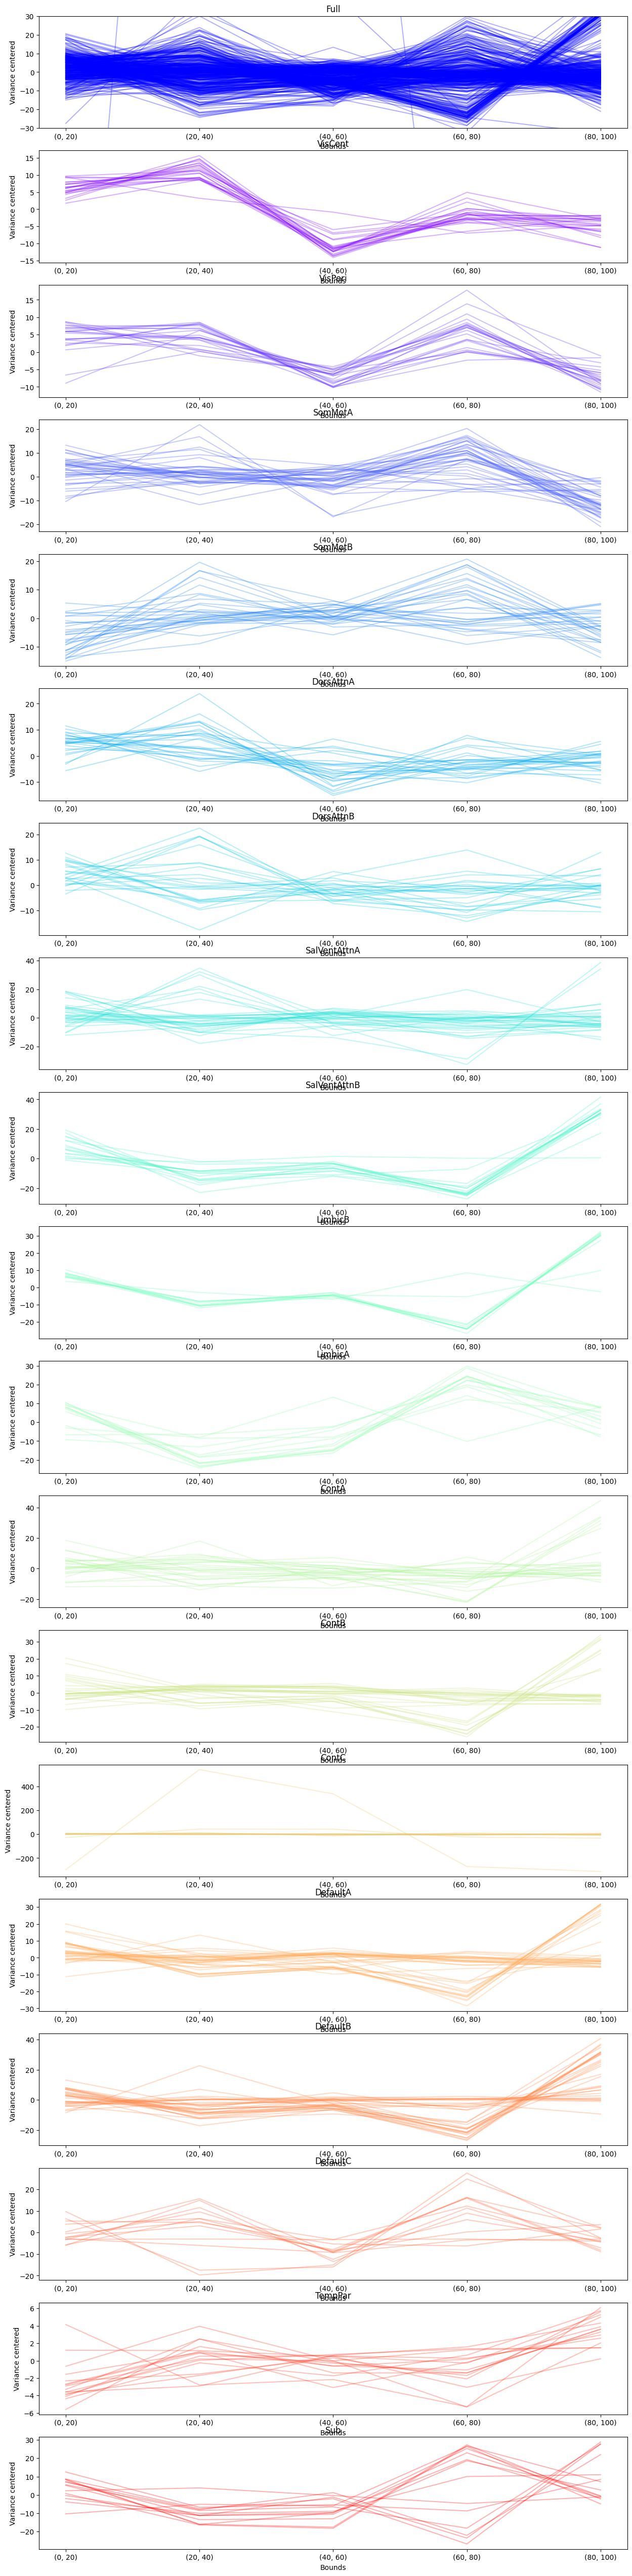

In [60]:
B = s20
perdf = np.asarray([orig_df[B].iloc[0][k] for k in range(len(orig_df[B].columns))]).T

from matplotlib.pyplot import cm

color = cm.rainbow(np.linspace(0, 1, len(index2region17)))

fig, ax = plt.subplots(len(index2region17)+1,1, figsize=(15,65))
for ridx in range(len(perdf)):
    ax[0].plot(perdf[ridx]-perdf[ridx].mean(), color='b', alpha=0.3)
    ax[0].set_ylim(-30,30)
    ax[0].set_title('Full')
    ax[0].set_xticklabels([str(b) for b in B])
    ax[0].set_xticks(np.arange(0,len(B)))
    ax[0].set_xlabel('Bounds')
    ax[0].set_ylabel('Variance centered')
    
for idx,net in enumerate(index2region17):
    region_idx = index2region17[net]
    for ridx in region_idx:
        ax[idx+1].set_title(net)
        ax[idx+1].plot(perdf[ridx]-perdf[ridx].mean(), color=color[idx], alpha=0.3)
    ax[idx+1].set_xticklabels([str(b) for b in B])
    ax[idx+1].set_xticks(np.arange(0,len(B)))
    ax[idx+1].set_xlabel('Bounds')
    ax[idx+1].set_ylabel('Variance centered')
#     if net == 'DorsAttn':
#         ax[idx+1].set_ylim(-10,12)
#     if net == 'Cont':
#         ax[idx+1].set_ylim(-10,12)

<a class="anchor" id="comb3fa"></a>
## Frame selected (by combined 3FA timecourses) gradients

In [150]:
cross = 'val-aro'
fselect_supermovie_grads = load('./resources/fselect_grads/fa_scores_withID/fglobal_cross_grads_supermovie_withID_{}_bin20.pkl'.format(cross))[0]
orig_df = {'type': [], 'standarddev': []}

for bounds in tqdm(fselect_supermovie_grads):
    subjects_grad = np.asarray(list(fselect_supermovie_grads[bounds].values()))
    fscore = np.asarray([D(subjects_grad.mean(axis=1)[k], subjects_grad[k]) for k in range(30)])

    
    orig_df['type'] += [bounds] * len(fscore.std(axis=0))
    orig_df['standarddev'] += list(fscore.std(axis=0))
    

orig_df1 = pd.DataFrame.from_dict(orig_df)

cross = 'val-pow'
fselect_supermovie_grads = load('./resources/fselect_grads/fa_scores_withID/fglobal_cross_grads_supermovie_withID_{}_bin20.pkl'.format(cross))[0]
orig_df = {'type': [], 'standarddev': []}

for bounds in tqdm(fselect_supermovie_grads):
    subjects_grad = np.asarray(list(fselect_supermovie_grads[bounds].values()))
    fscore = np.asarray([D(subjects_grad.mean(axis=1)[k], subjects_grad[k]) for k in range(30)])

    
    orig_df['type'] += [bounds] * len(fscore.std(axis=0))
    orig_df['standarddev'] += list(fscore.std(axis=0))
    

orig_df2 = pd.DataFrame.from_dict(orig_df)

cross = 'aro-pow'
fselect_supermovie_grads = load('./resources/fselect_grads/fa_scores_withID/fglobal_cross_grads_supermovie_withID_{}_bin20.pkl'.format(cross))[0]
orig_df = {'type': [], 'standarddev': []}

for bounds in tqdm(fselect_supermovie_grads):
    if len(fselect_supermovie_grads[bounds]) == 0:
        orig_df['type'] += [bounds] * 1
        orig_df['standarddev'] += [np.nan]
        continue
    subjects_grad = np.asarray(list(fselect_supermovie_grads[bounds].values()))
    fscore = np.asarray([D(subjects_grad.mean(axis=1)[k], subjects_grad[k]) for k in range(30)])

    
    orig_df['type'] += [bounds] * len(fscore.std(axis=0))
    orig_df['standarddev'] += list(fscore.std(axis=0))
    

orig_df3 = pd.DataFrame.from_dict(orig_df)

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

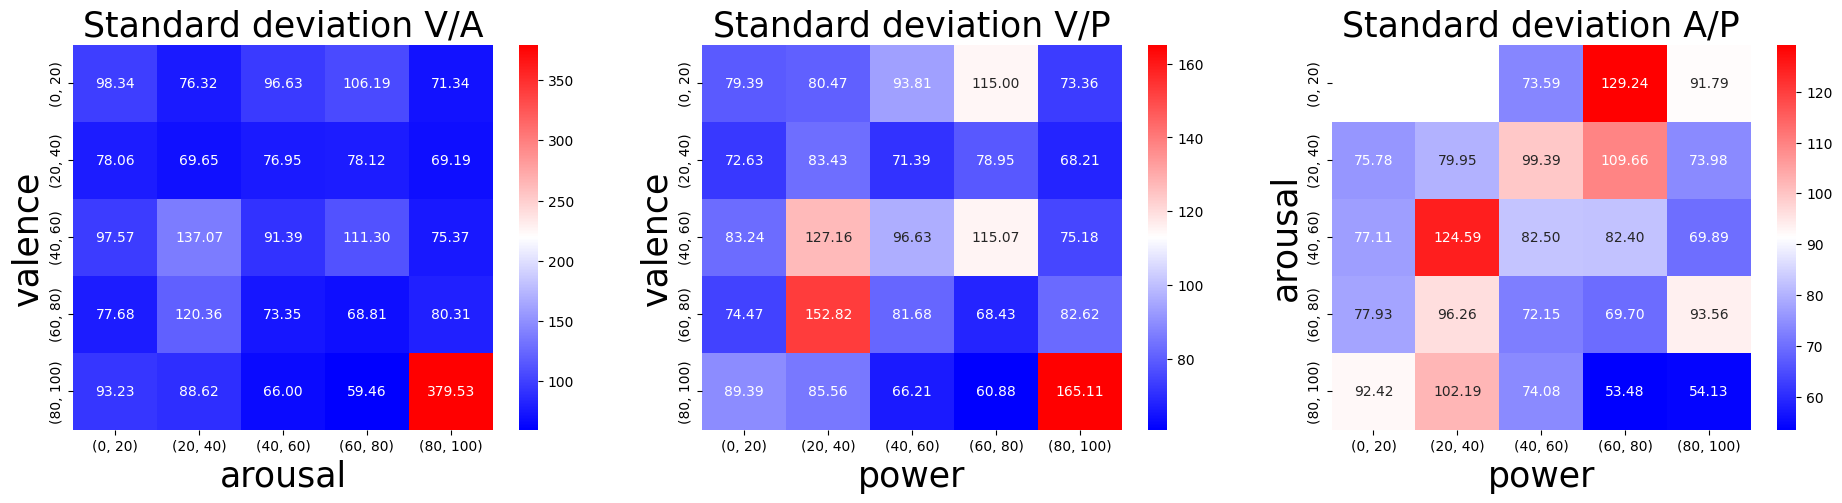

In [162]:
orig_dfs = [orig_df1, orig_df2, orig_df3]
fig, ax = plt.subplots(1,3, figsize=(23,5))

labels = [('valence', 'arousal'), ('valence','power'), ('arousal','power')]
titlelabels = ['V/A', 'V/P', 'A/P']

for k in range(3):
    sns.heatmap(orig_dfs[k].groupby('type').mean()['standarddev'].values.reshape((5,5)), annot=True,
               xticklabels=s20, yticklabels=s20, ax=ax[k], cmap='bwr',fmt='.2f')
    
    ax[k].set_xlabel(labels[k][1], fontsize=25)
    ax[k].set_ylabel(labels[k][0], fontsize=25)
    ax[k].set_title('Standard deviation {}'.format(titlelabels[k]), fontsize=25)

<a class="anchor" id="3fa"></a>
## Frame selected (by 3FA timecourses) gradients

In [76]:
# In-Tervals percentages
s5 = [(s,s+5) for s in range(0,101,5) if (s+5 <= 100)]
s10 = [(s,s+10) for s in range(0,101,10) if (s+10 <= 100)]
s20 = [(s,s+20) for s in range(0,101,20) if (s+20 <= 100)]
s25 = [(s,s+25) for s in range(0,101,25) if (s+25 <= 100)]
s33 = [(0,33), (33,66), (66,100)]
s50 = [(0,50), (50,100)]

In [78]:
# Params
embedding  = "dm" # diffusion map
aff_kernel = "pearson" #affinity matrix kernel
align_meth = "procrustes"
n_iter     = 10 # procrustes align number of iteration
nb_comp    = 3
rs         = 99

threshed_series = load('./resources/threshed_series/fa_global_treshed_series.pkl')

1. Frame selection compute

In [6]:
for i in range(3):
    # individual variance variables
    fselect_subjects_gradients = {}
    
    threshed = threshed_series[i]
    for rng in tqdm(threshed.keys()):
        selected_series = threshed[rng]

        # concatenate on different frames across movies
        # basically doing reordering of columns
        tmp = next(iter(selected_series))
        subject_numbers = list(selected_series[tmp].keys())
        subject_tmpseries = {_id:[] for _id in subject_numbers}

        for mname in selected_series:
            if len(selected_series[mname]) == 0: continue
            for _id in subject_numbers:
                subject_tmpseries[_id].append(selected_series[mname][_id])

        subject_series = []
        for _id in subject_numbers:
            subject_series.append(np.concatenate(subject_tmpseries[_id]))

        # if concatenated length not long enough then skip whole process
        if len(subject_series[0]) < 15: 
            fselect_subjects_gradients[rng] = []
            continue

        # Compute individual gradients according to selected frames
        subjects_gradients = []
        for nsub in range(len(subject_numbers)):
            tmp_series = np.asarray(subject_series)[nsub]
            fc_selects = FC(tmp_series)
            g_selects = GradientMaps(n_components=nb_comp, approach=embedding, 
                                kernel=aff_kernel, random_state=rs)
            g_selects.fit(fc_selects)
            subjects_gradients.append(g_selects.gradients_)

        # alignement across all gradients
        select_subjects_gradients,_,s = procrustes_align(np.asarray(subjects_gradients))
        select_subjects_gradients = np.asarray(select_subjects_gradients)
        fselect_subjects_gradients[rng] = select_subjects_gradients

    save('./resources/fselect_grads/fa_scores/fselect_global_subjects_gradientsFA{}.pkl'.format(i),
         fselect_subjects_gradients)

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

In [165]:
fa_stats = {}
# across fa number
for fa_nb in range(3):
    
    fselect_subjects_gradients = load('./resources/fselect_grads/fa_scores/fselect_global_subjects_gradientsFA{}.pkl'.format(fa_nb))
    orig_df = {}
    null_df = {}
    for bounds in tqdm(s5+s10+s20+s25+s33+s50):
        odf = {}
        ndf = {}

        lb,rb = bounds
        ssize = str(rb-lb)
        if ssize == '34': ssize='33' # ssizeck fix

        TMP = load('./resources/null_grad/sample_bins/nulldistrib_random{}.pkl'.format(ssize))

        A = []
        n_iter = 200

        for i in range(n_iter):
            tmp = np.asarray([D(TMP[i][bounds].mean(axis=1)[k],TMP[i][bounds][k]) for k in range(30)])
            A.append(tmp.std(axis=0))

        fscore = np.asarray([D(fselect_subjects_gradients[bounds].mean(axis=1)[k],
                  fselect_subjects_gradients[bounds][k]) for k in range(30)])

        odf['fullnet'] = fscore.std(axis=0)
        ndf['fullnet'] = A

        orig_df[bounds] = odf
        null_df[bounds] = ndf

    orig_df = pd.DataFrame.from_records(orig_df)
    null_df = pd.DataFrame.from_records(null_df)
    
    fa_stats[fa_nb] = (orig_df, null_df)

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

#### Compute slope and locate in null distrib slope

In [168]:
outlier_idx = [357]

fa_null = {}

for fa_nb in range(3):
    orig_df, null_df = fa_stats[fa_nb]
    
    nscores = {B[0][1]-B[0][0]: {} for B in [s20]}

    linear_coef = {B[0][1]-B[0][0]: {} for B in [s20]}
    
    # remove the outlier index
    tmp_index2region = {}
    for net in index2region:
        indexes = index2region[net]
        tmp_index2region[net] = np.array([idx for idx in indexes if idx not in outlier_idx])

    tmp_index2region['full'] = np.array([k for k in range(414) if k not in outlier_idx])

    for B in [s20]:
        for net in tmp_index2region.keys():
            subset = np.arange(len(B))
            # subset = [1,2]

            perdf = np.asarray([orig_df[B].iloc[0][k] for k in range(len(orig_df[B].columns))]).T
            nperdf = np.asarray([null_df[B].iloc[0][k] for k in range(len(null_df[B].columns))])

            # 1. Compute initial statistic
            y_train = np.concatenate([perdf[tmp_index2region[net]][:,i] - perdf[tmp_index2region[net]].mean(axis=1) 
                                      for i in subset])
            X_train = np.concatenate([tmp_index2region[net].shape[0] * [i] for i in range(len(subset))])

            regressor = LinearRegression()
            regressor.fit(X_train.reshape(-1,1), y_train)
            initial_coef = regressor.coef_[0]

            intercept = regressor.intercept_
            linear_coef[B[0][1]-B[0][0]][net] = (initial_coef,intercept)

            # 2. Generate null statistics
            null_distrib = []
            null_intercepts = []
            n_iter = 200

            for k in range(n_iter):
                tmpdf = nperdf[:,k].T
                y_train = np.concatenate([tmpdf[tmp_index2region[net]][:,i] - tmpdf[tmp_index2region[net]].mean(axis=1) 
                                          for i in subset])
                X_train = np.concatenate([tmp_index2region[net].shape[0] * [i] for i in range(len(subset))])
                regressor = LinearRegression()
                regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))
                null_coef = regressor.coef_[0][0]
                null_distrib.append(null_coef)
                null_intercepts.append(regressor.intercept_)

            null_distrib = np.array(null_distrib)
            null_intercepts = np.array(null_intercepts)

            # 3. Compute null score
            nscores[B[0][1]-B[0][0]][net] = null_score(null_distrib, initial_coef)
    
    fa_null[fa_nb] = (nscores, linear_coef)

In [169]:
pd.DataFrame.from_records(fa_null[2][0])

20
Cont         0.065
Default      0.095
DorsAttn     0.445
Limbic       0.070
SalVentAttn  0.115
SomMot       0.260
Sub          0.135
Vis          0.110
full         0.070

#### Visualize standard deviations for all 3 fa

In [170]:
B = deepcopy(s20)

#### 1. Valence

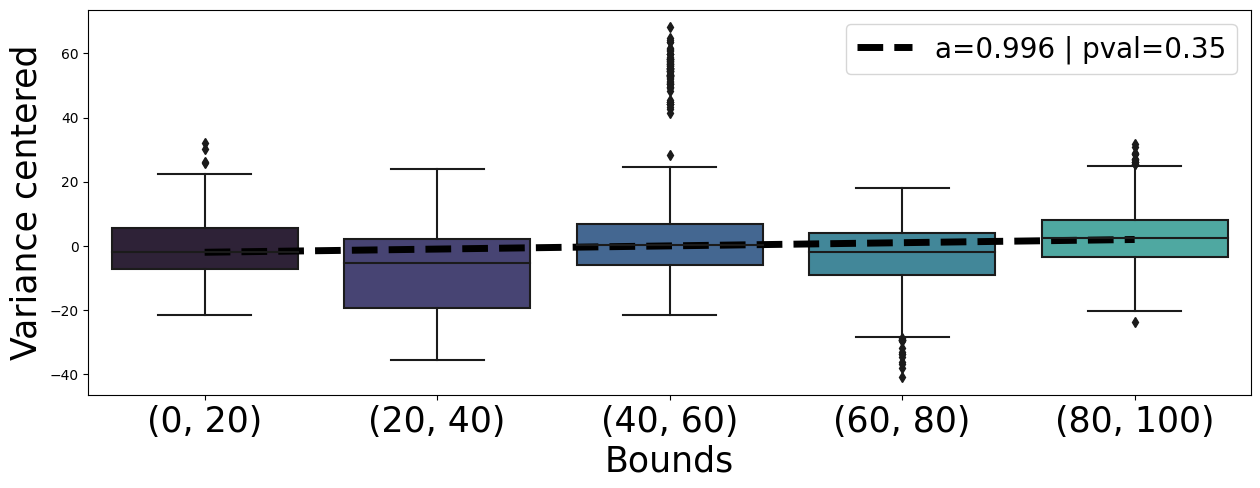

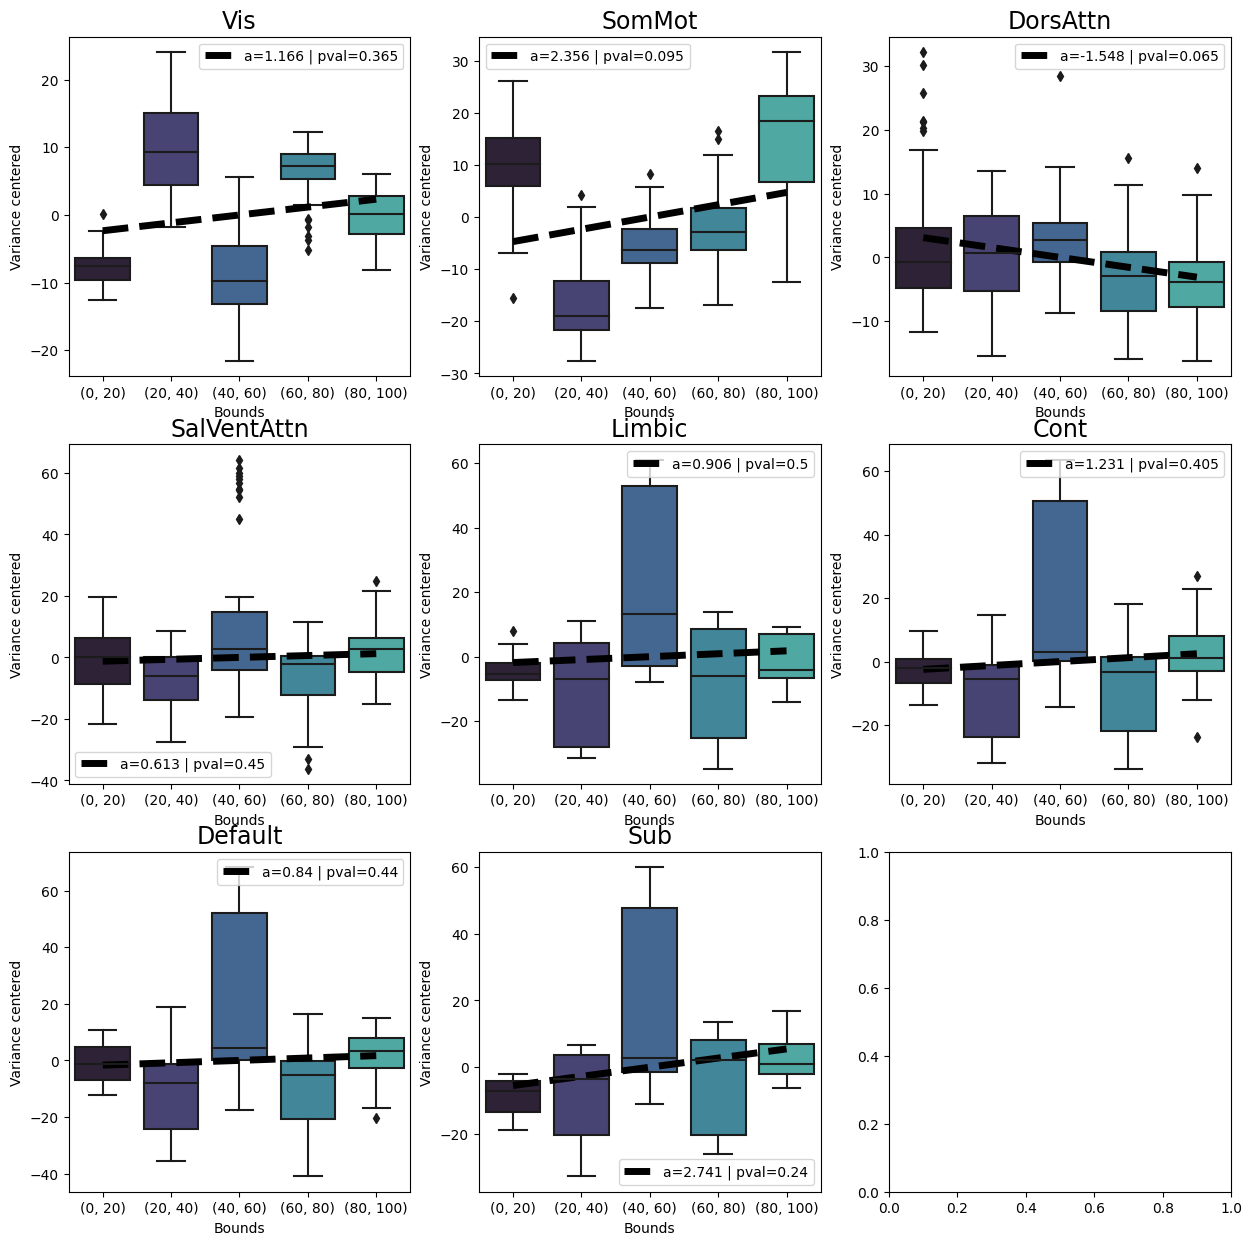

In [171]:
orig_df, null_df = fa_stats[0] # first factor
nscores, linear_coef = fa_null[0]

ssize = B[0][1]-B[0][0]
perdf = np.asarray([orig_df[B].iloc[0][k] for k in range(len(orig_df[B].columns))]).T

from matplotlib.pyplot import cm

color = cm.rainbow(np.linspace(0, 1, len(tmp_index2region)))

# PLOT 1: Entire gradients
net = 'full'
fig, ax = plt.subplots(figsize=(15,5))
region_idx = tmp_index2region[net]

full_vardf = {'var': [], 'bound': []}
for ridx in region_idx:
    if ridx in outlier_idx: continue
    # ax.plot(perdf[ridx]-perdf[ridx].mean(), color="c", alpha=0.2, linestyle="--")
    
    full_vardf['var'] += list(perdf[ridx]-perdf[ridx].mean())
    full_vardf['bound'] += B

full_vardf = pd.DataFrame.from_dict(full_vardf)
sns.boxplot(data=full_vardf, x="bound", y="var", ax=ax, palette=sns.color_palette("mako", as_cmap=False))
    
a,b = linear_coef[ssize][net]
flag = nscores[ssize][net] <= 0.05
# plot trend
if flag:
    ax.plot(a*np.arange(len(B)) + b,
        color='r',linestyle='--', linewidth=5, 
        label="a={} | pval={}".format(np.round(a,3),nscores[ssize][net]))
else:
    ax.plot(a*np.arange(len(B)) + b,
        color='k',linestyle='--', linewidth=5,
        label="a={} | pval={}".format(np.round(a,3),nscores[ssize][net]))
        
ax.legend(prop={'size':20})
ax.set_xticklabels([str(b) for b in B], fontsize=25)
ax.set_xticks(np.arange(0,len(B)), fontsize=25)
ax.set_xlabel('Bounds', fontsize=25)
ax.set_ylabel('Variance centered', fontsize=25)



# PLOT 2: Network-wise gradients
fig, ax = plt.subplots(len(tmp_index2region)//3,3, figsize=(15,15))
display_order = list(tmp_index2region.keys())[:-1]
for idx,net in enumerate(display_order):
    r,c = idx//3, idx%3
    region_idx = tmp_index2region[net]
    ax[r,c].set_title(net, fontsize=17)
    vardf = {'var': [], 'bound': []}
    for ridx in region_idx:
        if ridx in outlier_idx: continue
        
        # ax[r,c].plot(perdf[ridx]-perdf[ridx].mean(), color=color[idx], alpha=0.3)
        vardf['var'] += list(perdf[ridx]-perdf[ridx].mean())
        vardf['bound'] += B
    
    vardf = pd.DataFrame.from_dict(vardf)
    sns.boxplot(data=vardf, x="bound", y="var", ax=ax[r,c],palette=sns.color_palette("mako", as_cmap=False))
    
    a,b = linear_coef[ssize][net]
    flag = nscores[ssize][net] <= 0.05
    # plot trend
    if flag:
        ax[r,c].plot(a*np.arange(len(B)) + b,
                       color='r',linestyle='--', linewidth=5, 
                     label="a={} | pval={}".format(np.round(a,3),nscores[ssize][net]))
    else:
        ax[r,c].plot(a*np.arange(len(B)) + b,
                       color='k',linestyle='--', linewidth=5,
                    label="a={} | pval={}".format(np.round(a,3),nscores[ssize][net]))
        
    ax[r,c].legend()
    ax[r,c].set_xticklabels([str(b) for b in B])
    ax[r,c].set_xticks(np.arange(0,len(B)))
    ax[r,c].set_xlabel('Bounds')
    ax[r,c].set_ylabel('Variance centered')

#### 2. Arousal

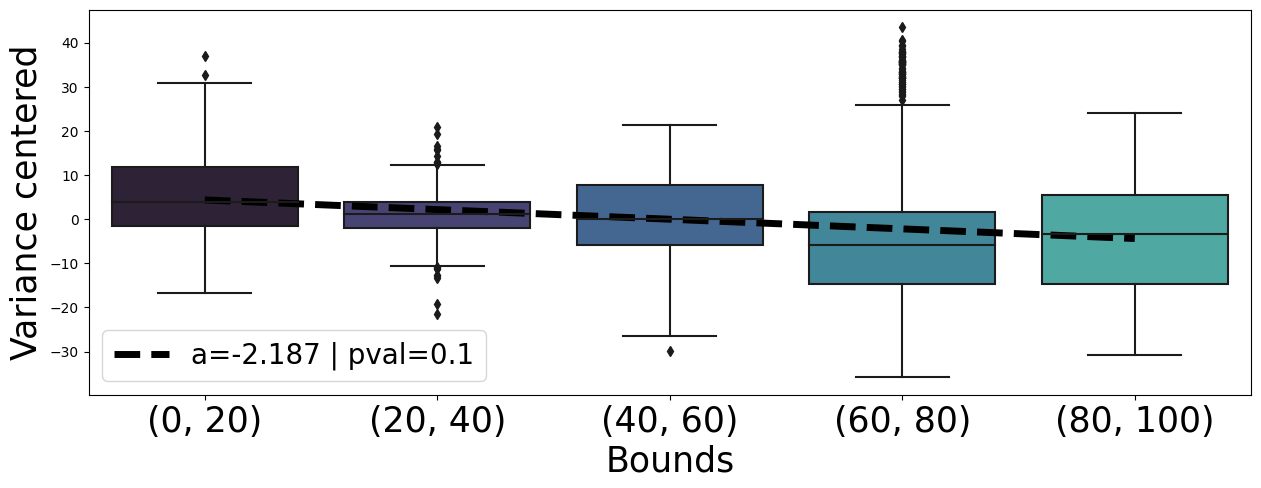

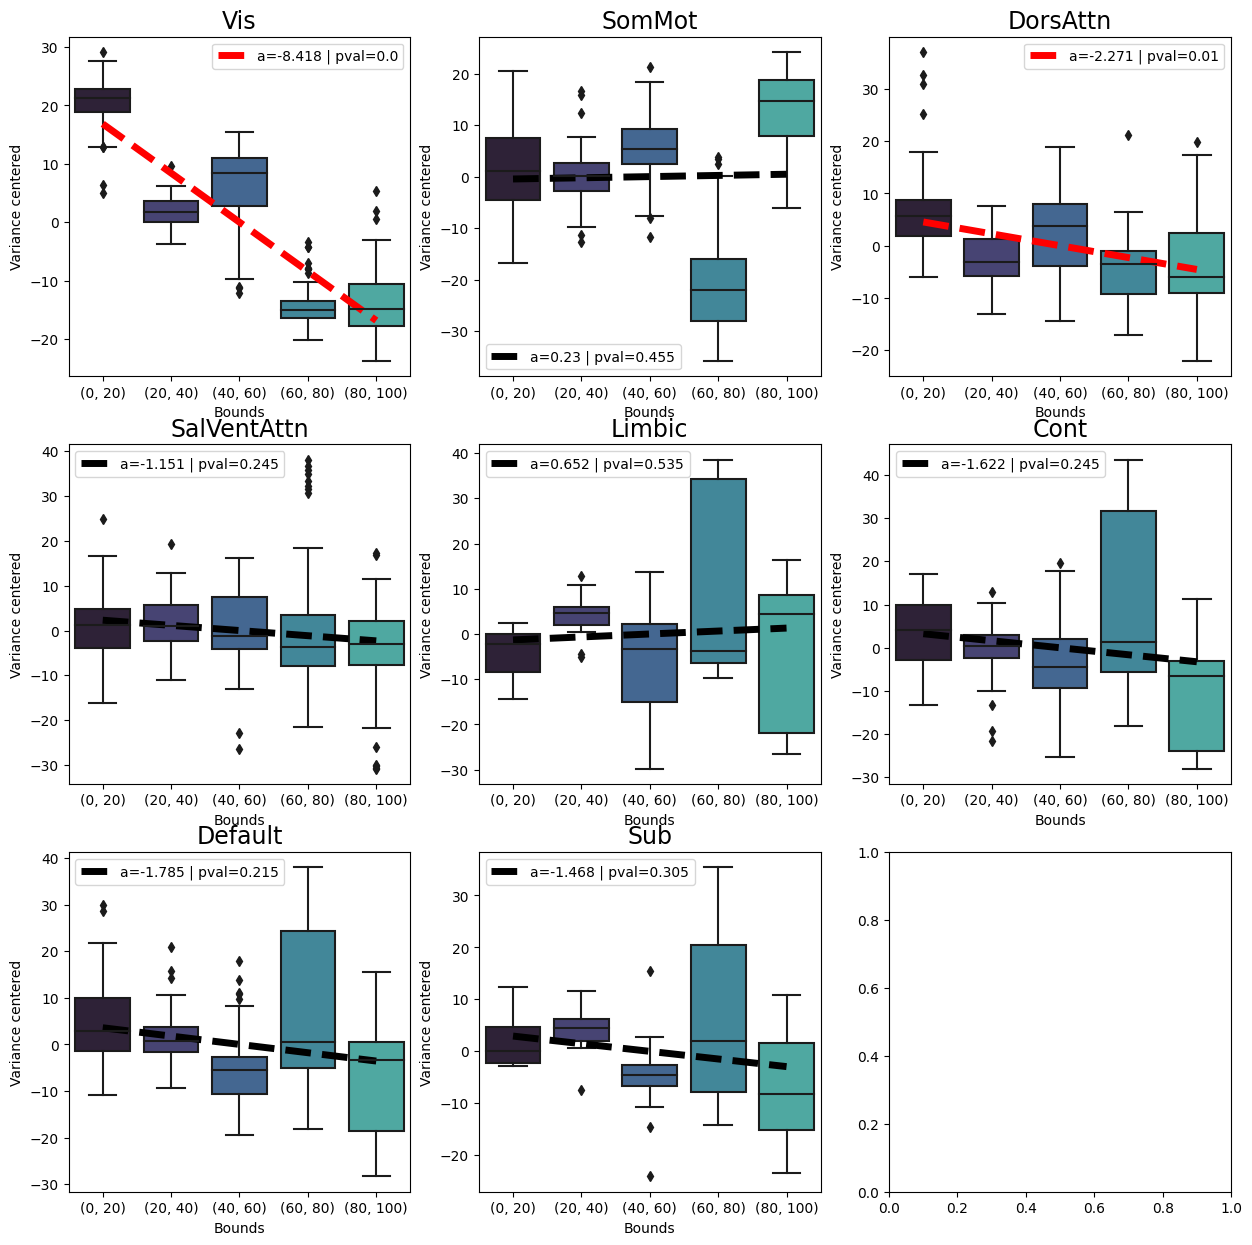

In [174]:
orig_df, null_df = fa_stats[1] # first factor
nscores, linear_coef = fa_null[1]

ssize = B[0][1]-B[0][0]
perdf = np.asarray([orig_df[B].iloc[0][k] for k in range(len(orig_df[B].columns))]).T

from matplotlib.pyplot import cm

color = cm.rainbow(np.linspace(0, 1, len(tmp_index2region)))

# PLOT 1: Entire gradients
net = 'full'
fig, ax = plt.subplots(figsize=(15,5))
region_idx = tmp_index2region[net]

full_vardf = {'var': [], 'bound': []}
for ridx in region_idx:
    if ridx in outlier_idx: continue
    # ax.plot(perdf[ridx]-perdf[ridx].mean(), color="c", alpha=0.2, linestyle="--")
    
    full_vardf['var'] += list(perdf[ridx]-perdf[ridx].mean())
    full_vardf['bound'] += B

full_vardf = pd.DataFrame.from_dict(full_vardf)
sns.boxplot(data=full_vardf, x="bound", y="var", ax=ax, palette=sns.color_palette("mako", as_cmap=False))
    
a,b = linear_coef[ssize][net]
flag = nscores[ssize][net] <= 0.05
# plot trend
if flag:
    ax.plot(a*np.arange(len(B)) + b,
        color='r',linestyle='--', linewidth=5, 
        label="a={} | pval={}".format(np.round(a,3),nscores[ssize][net]))
else:
    ax.plot(a*np.arange(len(B)) + b,
        color='k',linestyle='--', linewidth=5,
        label="a={} | pval={}".format(np.round(a,3),nscores[ssize][net]))
        
ax.legend(prop={'size':20})
ax.set_xticklabels([str(b) for b in B], fontsize=25)
ax.set_xticks(np.arange(0,len(B)), fontsize=25)
ax.set_xlabel('Bounds', fontsize=25)
ax.set_ylabel('Variance centered', fontsize=25)



# PLOT 2: Network-wise gradients
fig, ax = plt.subplots(len(tmp_index2region)//3,3, figsize=(15,15))
display_order = list(tmp_index2region.keys())[:-1]
for idx,net in enumerate(display_order):
    r,c = idx//3, idx%3
    region_idx = tmp_index2region[net]
    ax[r,c].set_title(net, fontsize=17)
    vardf = {'var': [], 'bound': []}
    for ridx in region_idx:
        if ridx in outlier_idx: continue
        
        # ax[r,c].plot(perdf[ridx]-perdf[ridx].mean(), color=color[idx], alpha=0.3)
        vardf['var'] += list(perdf[ridx]-perdf[ridx].mean())
        vardf['bound'] += B
    
    vardf = pd.DataFrame.from_dict(vardf)
    sns.boxplot(data=vardf, x="bound", y="var", ax=ax[r,c],palette=sns.color_palette("mako", as_cmap=False))
    
    a,b = linear_coef[ssize][net]
    flag = nscores[ssize][net] <= 0.05
    # plot trend
    if flag:
        ax[r,c].plot(a*np.arange(len(B)) + b,
                       color='r',linestyle='--', linewidth=5, 
                     label="a={} | pval={}".format(np.round(a,3),nscores[ssize][net]))
    else:
        ax[r,c].plot(a*np.arange(len(B)) + b,
                       color='k',linestyle='--', linewidth=5,
                    label="a={} | pval={}".format(np.round(a,3),nscores[ssize][net]))
        
    ax[r,c].legend()
    ax[r,c].set_xticklabels([str(b) for b in B])
    ax[r,c].set_xticks(np.arange(0,len(B)))
    ax[r,c].set_xlabel('Bounds')
    ax[r,c].set_ylabel('Variance centered')

#### 3. Power

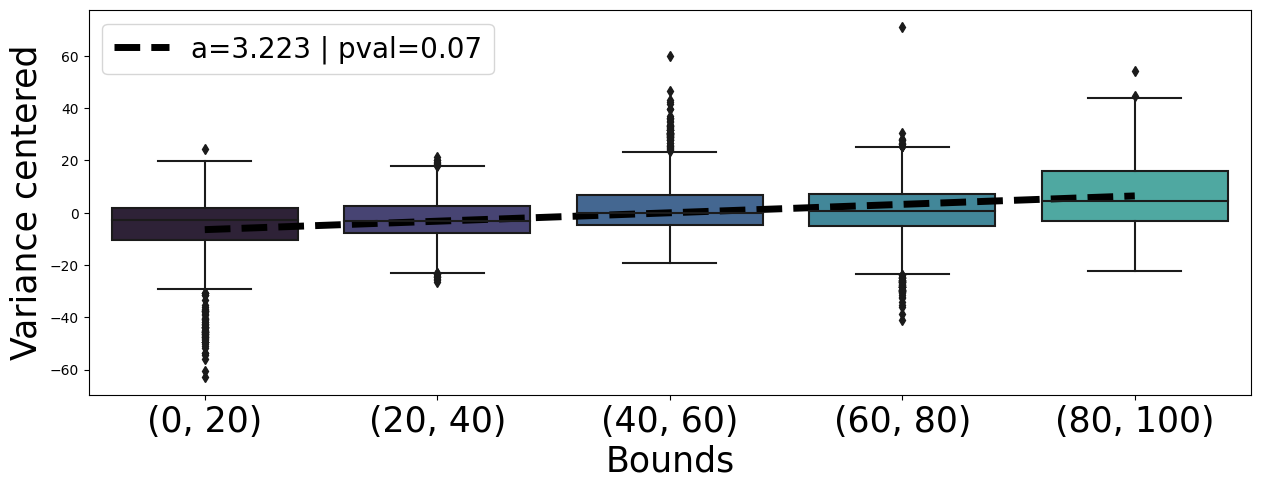

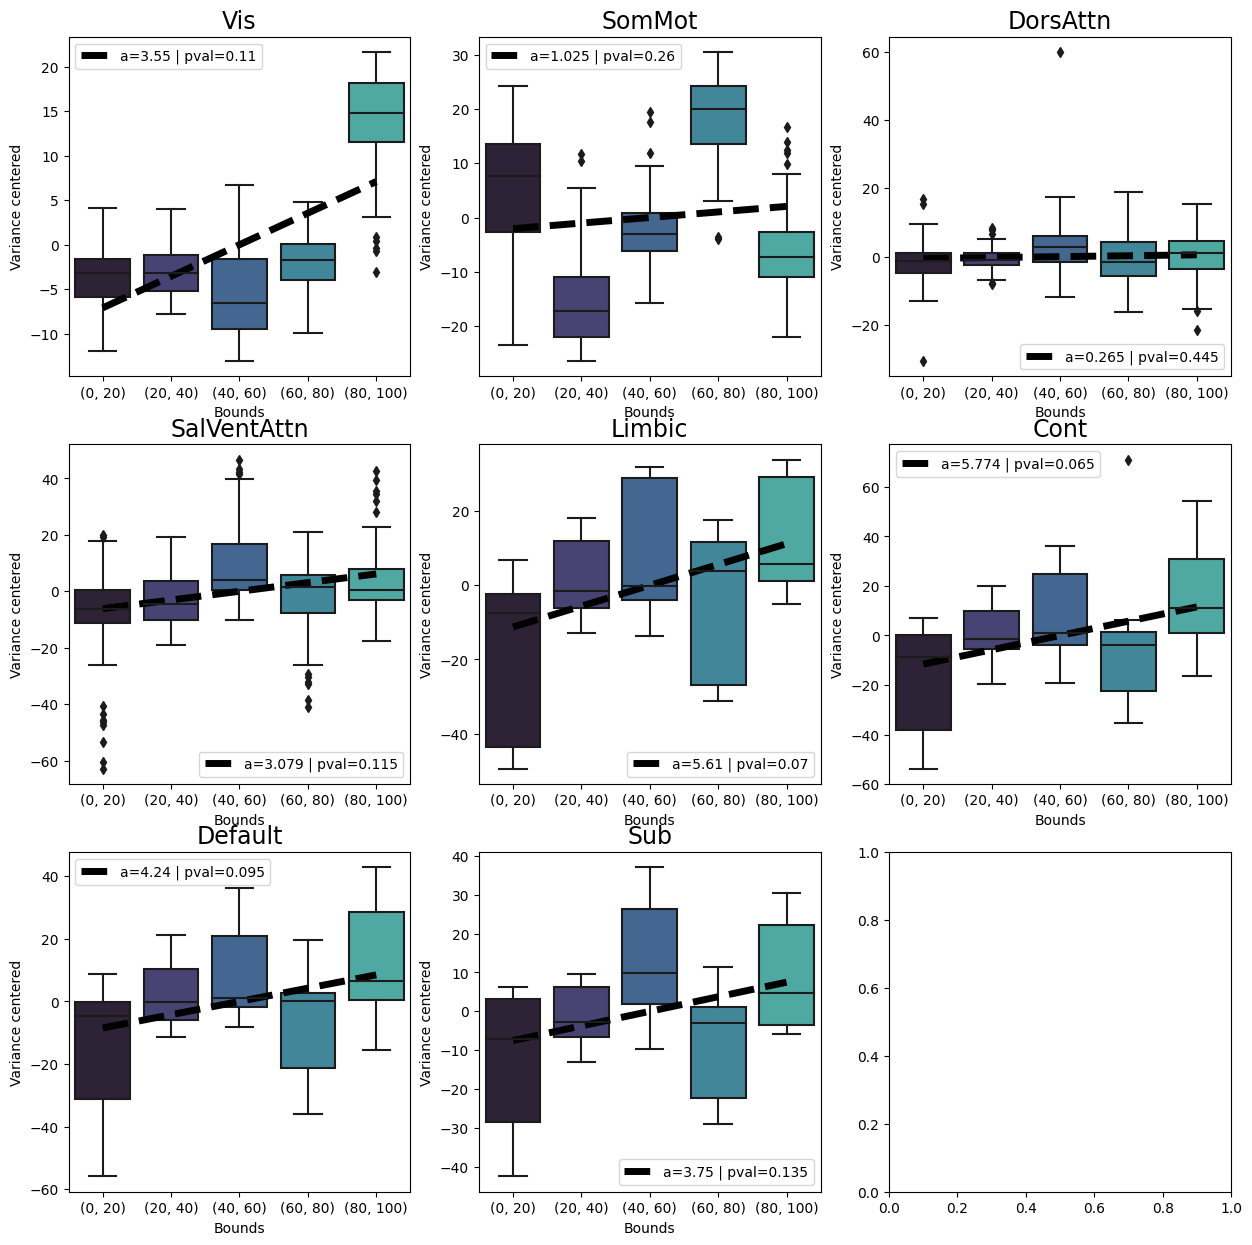

In [175]:
orig_df, null_df = fa_stats[2] # first factor
nscores, linear_coef = fa_null[2]

ssize = B[0][1]-B[0][0]
perdf = np.asarray([orig_df[B].iloc[0][k] for k in range(len(orig_df[B].columns))]).T

from matplotlib.pyplot import cm

color = cm.rainbow(np.linspace(0, 1, len(tmp_index2region)))

# PLOT 1: Entire gradients
net = 'full'
fig, ax = plt.subplots(figsize=(15,5))
region_idx = tmp_index2region[net]

full_vardf = {'var': [], 'bound': []}
for ridx in region_idx:
    if ridx in outlier_idx: continue
    # ax.plot(perdf[ridx]-perdf[ridx].mean(), color="c", alpha=0.2, linestyle="--")
    
    full_vardf['var'] += list(perdf[ridx]-perdf[ridx].mean())
    full_vardf['bound'] += B

full_vardf = pd.DataFrame.from_dict(full_vardf)
sns.boxplot(data=full_vardf, x="bound", y="var", ax=ax, palette=sns.color_palette("mako", as_cmap=False))
    
a,b = linear_coef[ssize][net]
flag = nscores[ssize][net] <= 0.05
# plot trend
if flag:
    ax.plot(a*np.arange(len(B)) + b,
        color='r',linestyle='--', linewidth=5, 
        label="a={} | pval={}".format(np.round(a,3),nscores[ssize][net]))
else:
    ax.plot(a*np.arange(len(B)) + b,
        color='k',linestyle='--', linewidth=5,
        label="a={} | pval={}".format(np.round(a,3),nscores[ssize][net]))
        
ax.legend(prop={'size':20})
ax.set_xticklabels([str(b) for b in B], fontsize=25)
ax.set_xticks(np.arange(0,len(B)), fontsize=25)
ax.set_xlabel('Bounds', fontsize=25)
ax.set_ylabel('Variance centered', fontsize=25)



# PLOT 2: Network-wise gradients
fig, ax = plt.subplots(len(tmp_index2region)//3,3, figsize=(15,15))
display_order = list(tmp_index2region.keys())[:-1]
for idx,net in enumerate(display_order):
    r,c = idx//3, idx%3
    region_idx = tmp_index2region[net]
    ax[r,c].set_title(net, fontsize=17)
    vardf = {'var': [], 'bound': []}
    for ridx in region_idx:
        if ridx in outlier_idx: continue
        
        # ax[r,c].plot(perdf[ridx]-perdf[ridx].mean(), color=color[idx], alpha=0.3)
        vardf['var'] += list(perdf[ridx]-perdf[ridx].mean())
        vardf['bound'] += B
    
    vardf = pd.DataFrame.from_dict(vardf)
    sns.boxplot(data=vardf, x="bound", y="var", ax=ax[r,c],palette=sns.color_palette("mako", as_cmap=False))
    
    a,b = linear_coef[ssize][net]
    flag = nscores[ssize][net] <= 0.05
    # plot trend
    if flag:
        ax[r,c].plot(a*np.arange(len(B)) + b,
                       color='r',linestyle='--', linewidth=5, 
                     label="a={} | pval={}".format(np.round(a,3),nscores[ssize][net]))
    else:
        ax[r,c].plot(a*np.arange(len(B)) + b,
                       color='k',linestyle='--', linewidth=5,
                    label="a={} | pval={}".format(np.round(a,3),nscores[ssize][net]))
        
    ax[r,c].legend()
    ax[r,c].set_xticklabels([str(b) for b in B])
    ax[r,c].set_xticks(np.arange(0,len(B)))
    ax[r,c].set_xlabel('Bounds')
    ax[r,c].set_ylabel('Variance centered')

<a class="anchor" id="3fa"></a>
## Frame selected (by pareto 3FA timecourses) gradients

In [58]:
# In-Tervals percentages
s5 = [(s,s+5) for s in range(0,101,5) if (s+5 <= 100)]
s10 = [(s,s+10) for s in range(0,101,10) if (s+10 <= 100)]
s20 = [(s,s+20) for s in range(0,101,20) if (s+20 <= 100)]
s25 = [(s,s+25) for s in range(0,101,25) if (s+25 <= 100)]
s33 = [(0,33), (33,66), (66,100)]
s50 = [(0,50), (50,100)]

In [5]:
# Params
embedding  = "dm" # diffusion map
aff_kernel = "pearson" #affinity matrix kernel
align_meth = "procrustes"
n_iter     = 10 # procrustes align number of iteration
nb_comp    = 3
rs         = 99

threshed_series = load('./resources/fa_pareto_treshed_series.pkl')

1. Frame selection compute

In [7]:
# individual variance variables
fselect_subjects_gradients = {}

threshed = deepcopy(threshed_series)
for rng in tqdm(threshed.keys()):
    selected_series = threshed[rng]

    # concatenate on different frames across movies
    # basically doing reordering of columns
    tmp = next(iter(selected_series))
    subject_numbers = list(selected_series[tmp].keys())
    subject_tmpseries = {_id:[] for _id in subject_numbers}

    for mname in selected_series:
        if len(selected_series[mname]) == 0: continue
        for _id in subject_numbers:
            subject_tmpseries[_id].append(selected_series[mname][_id])

    subject_series = []
    for _id in subject_numbers:
        subject_series.append(np.concatenate(subject_tmpseries[_id]))

    # if concatenated length not long enough then skip whole process
    if len(subject_series[0]) < 15: 
        fselect_subjects_gradients[rng] = []
        continue

    # Compute individual gradients according to selected frames
    subjects_gradients = []
    for nsub in range(len(subject_numbers)):
        tmp_series = np.asarray(subject_series)[nsub]
        fc_selects = FC(tmp_series)
        g_selects = GradientMaps(n_components=nb_comp, approach=embedding, 
                            kernel=aff_kernel, random_state=rs)
        g_selects.fit(fc_selects)
        subjects_gradients.append(g_selects.gradients_)

    # alignement across all gradients
    select_subjects_gradients,_,s = procrustes_align(np.asarray(subjects_gradients))
    select_subjects_gradients = np.asarray(select_subjects_gradients)
    fselect_subjects_gradients[rng] = select_subjects_gradients

save('./resources/fselect_grads/fa-pareto_scores/fselect_subjects_gradientsFA-pareto.pkl', fselect_subjects_gradients)

  0%|          | 0/44 [00:00<?, ?it/s]

In [59]:
fselect_subjects_gradients = load('./resources/fselect_grads/fa-pareto_scores/fselect_subjects_gradientsFA-pareto.pkl')

In [60]:
orig_df = {}
null_df = {}
for bounds in tqdm(s5+s10+s20+s25+s33+s50):
    odf = {}
    ndf = {}
    
    lb,rb = bounds
    ssize = str(rb-lb)
    if ssize == '34': ssize='33' # ssizeck fix

    TMP = load('./resources/null_grad/sample_bins/nulldistrib_random{}.pkl'.format(ssize))
    
    A = []
    n_iter = 200

    for i in range(n_iter):
        tmp = np.asarray([D(TMP[i][bounds].mean(axis=1)[k],TMP[i][bounds][k]) for k in range(30)])
        A.append(tmp.std(axis=0))

    fscore = np.asarray([D(fselect_subjects_gradients[bounds].mean(axis=1)[k],
              fselect_subjects_gradients[bounds][k]) for k in range(30)])
    
    odf['fullnet'] = fscore.std(axis=0)
    ndf['fullnet'] = A
        
    orig_df[bounds] = odf
    null_df[bounds] = ndf

orig_df = pd.DataFrame.from_records(orig_df)
null_df = pd.DataFrame.from_records(null_df)

  0%|          | 0/44 [00:00<?, ?it/s]

#### Compute slope and locate in null distrib slope

In [61]:
from sklearn.linear_model import LinearRegression

In [76]:
outlier_idx = [357]

nscores = {B[0][1]-B[0][0]: {} for B in [s5,s10,s20, s25, s33, s50]}

linear_coef = {B[0][1]-B[0][0]: {} for B in [s5,s10,s20, s25, s33, s50]}

# remove the outlier index
tmp_index2region17 = {}
for net in index2region17:
    indexes = index2region17[net]
    tmp_index2region17[net] = np.array([idx for idx in indexes if idx not in outlier_idx])

tmp_index2region17['full'] = np.array([k for k in range(414) if k not in outlier_idx])

for B in [s5,s10,s20, s25, s33, s50]:
    for net in tmp_index2region17.keys():
        subset = np.arange(len(B))
        # subset = [1,2]

        perdf = np.asarray([orig_df[B].iloc[0][k] for k in range(len(orig_df[B].columns))]).T
        nperdf = np.asarray([null_df[B].iloc[0][k] for k in range(len(null_df[B].columns))])
        
        # 1. Compute initial statistic
        y_train = np.concatenate([perdf[tmp_index2region17[net]][:,i] - perdf[tmp_index2region17[net]].mean(axis=1) 
                                  for i in subset])
        X_train = np.concatenate([tmp_index2region17[net].shape[0] * [i] for i in range(len(subset))])

        regressor = LinearRegression()
        regressor.fit(X_train.reshape(-1,1), y_train)
        initial_coef = regressor.coef_[0]

        intercept = regressor.intercept_
        linear_coef[B[0][1]-B[0][0]][net] = (initial_coef,intercept)
        
        # 2. Generate null statistics
        null_distrib = []
        null_intercepts = []
        n_iter = 200

        for k in range(n_iter):
            tmpdf = nperdf[:,k].T
            y_train = np.concatenate([tmpdf[tmp_index2region17[net]][:,i] - tmpdf[tmp_index2region17[net]].mean(axis=1) 
                                      for i in subset])
            X_train = np.concatenate([tmp_index2region17[net].shape[0] * [i] for i in range(len(subset))])
            regressor = LinearRegression()
            regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))
            null_coef = regressor.coef_[0][0]
            null_distrib.append(null_coef)
            null_intercepts.append(regressor.intercept_)

        null_distrib = np.array(null_distrib)
        null_intercepts = np.array(null_intercepts)

        # 3. Compute null score
        nscores[B[0][1]-B[0][0]][net] = null_score(null_distrib, initial_coef)

In [78]:
pd.DataFrame.from_records(nscores)

5      10     20     25     33     50
VisCent       0.190  0.290  0.265  0.355  0.435  0.170
VisPeri       0.190  0.290  0.240  0.200  0.535  0.135
SomMotA       0.120  0.070  0.260  0.130  0.285  0.495
SomMotB       0.355  0.285  0.145  0.440  0.320  0.140
DorsAttnA     0.180  0.265  0.180  0.200  0.340  0.125
DorsAttnB     0.155  0.205  0.260  0.015  0.060  0.075
SalVentAttnA  0.440  0.355  0.255  0.175  0.245  0.230
SalVentAttnB  0.310  0.320  0.335  0.260  0.320  0.295
LimbicB       0.295  0.250  0.315  0.230  0.280  0.235
LimbicA       0.305  0.200  0.070  0.065  0.025  0.005
ContA         0.530  0.370  0.535  0.255  0.245  0.225
ContB         0.240  0.250  0.190  0.215  0.260  0.180
ContC         0.350  0.275  0.375  0.400  0.515  0.350
DefaultA      0.345  0.315  0.270  0.225  0.230  0.240
DefaultB      0.330  0.315  0.355  0.285  0.360  0.305
DefaultC      0.325  0.490  0.200  0.170  0.235  0.085
TempPar       0.060  0.000  0.005  0.005  0.005  0.000
Sub           0.425  0.325  0.220  0.155  0.140  0.110
full          0.265  0.230  0.230  0.150  0.215  0.170

#### Visualize standard deviations

/tmp/ipykernel_52018/918599984.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[r,c].set_xticklabels([str(b) for b in B])


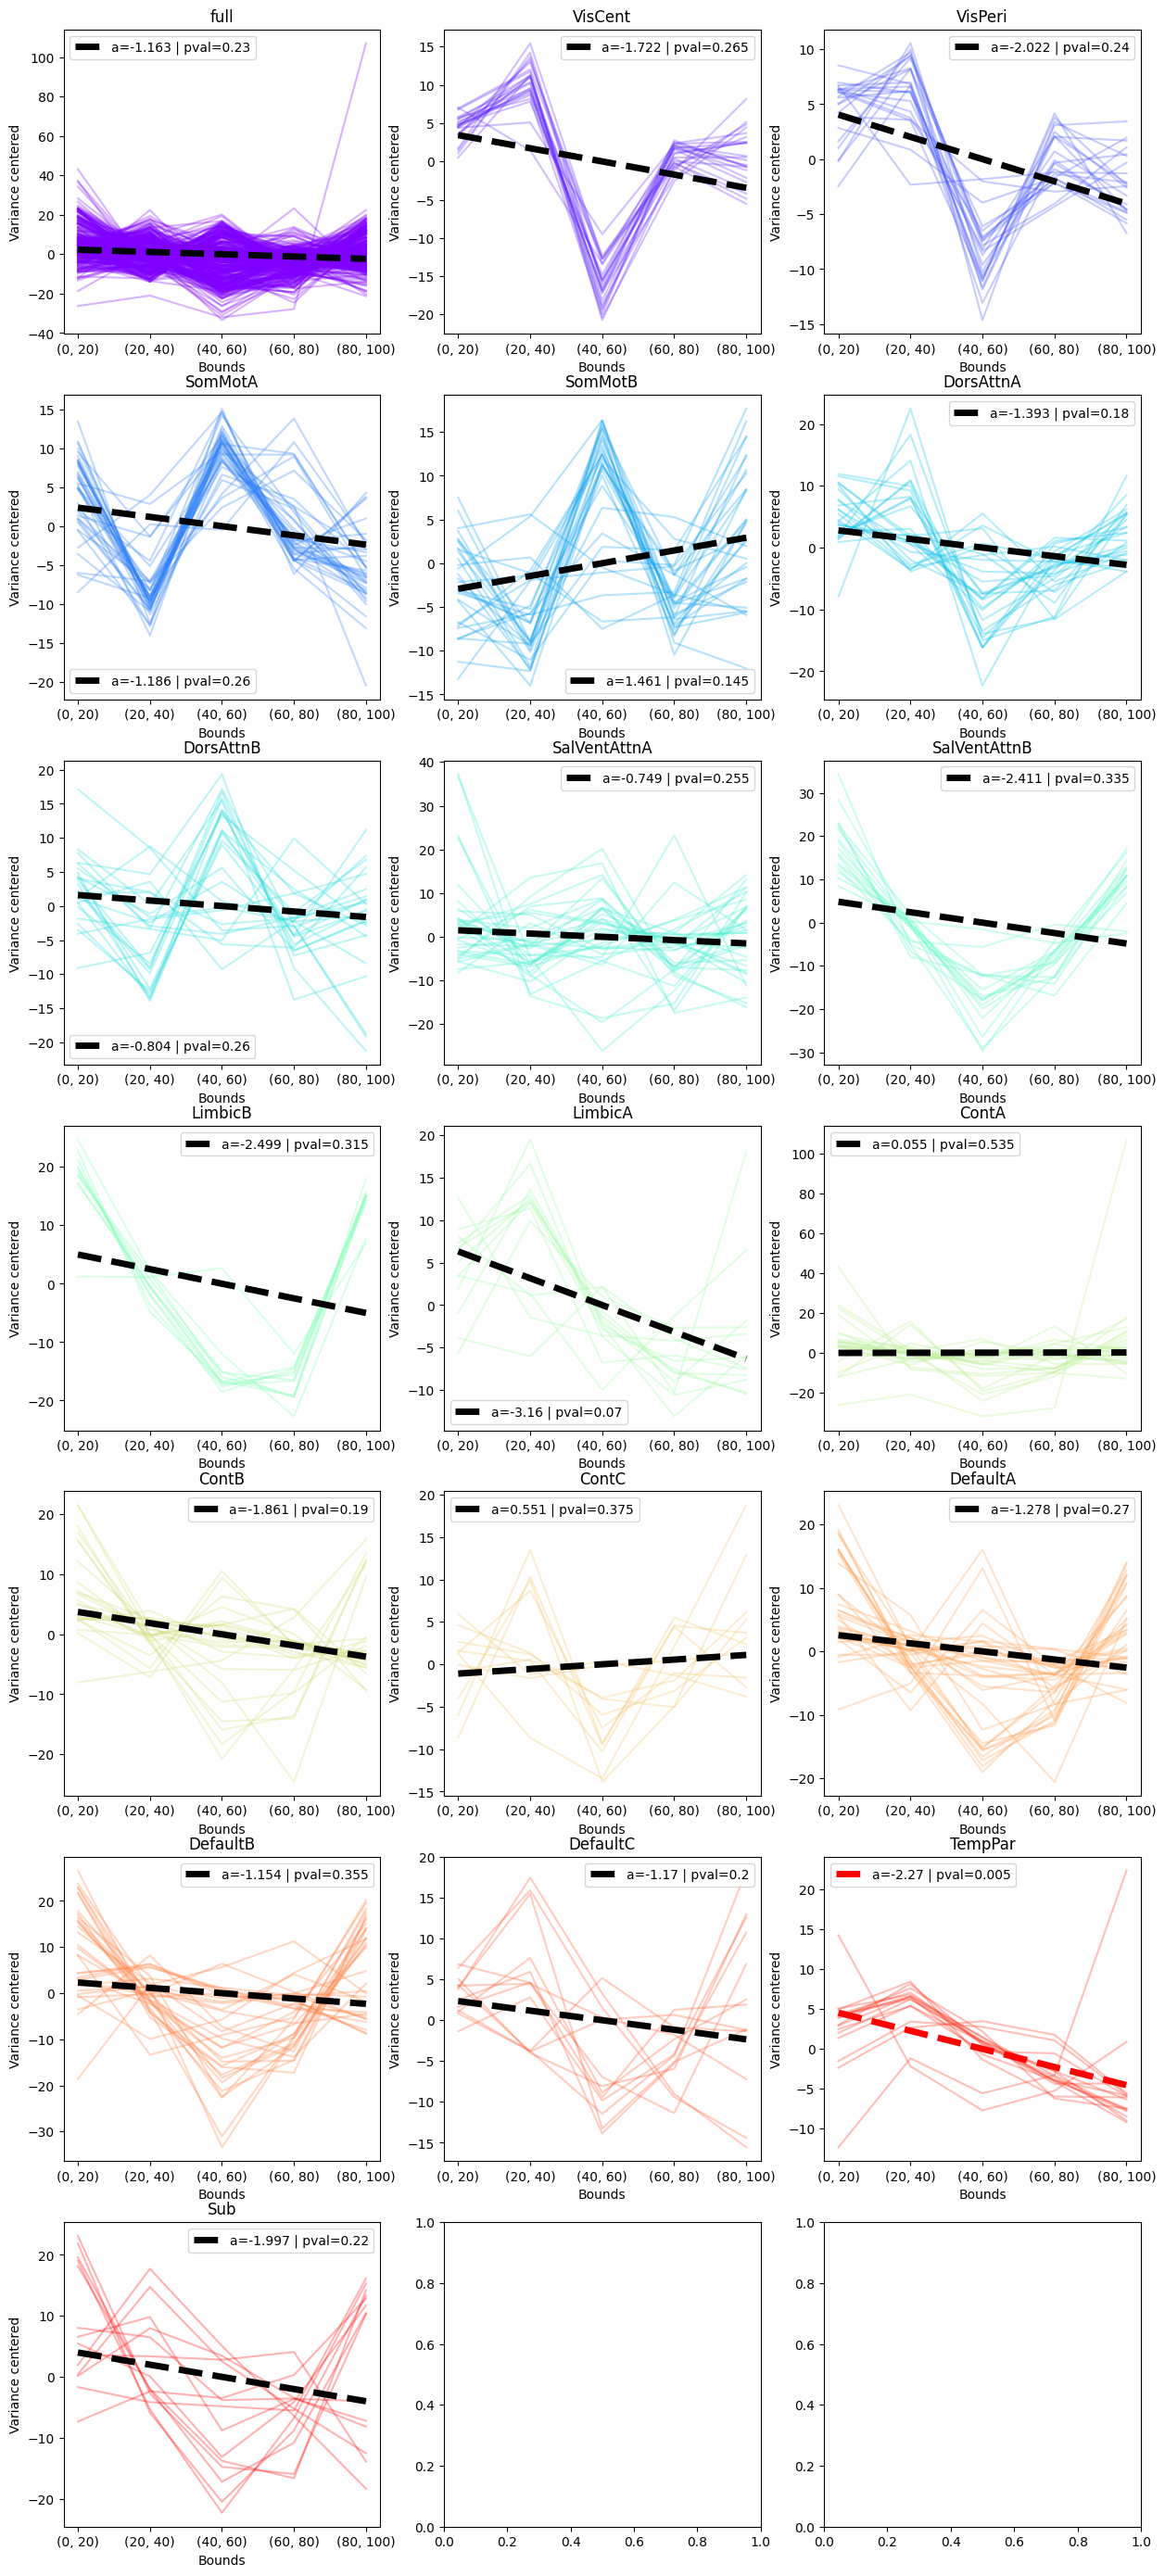

In [80]:
B = s20
ssize = B[0][1]-B[0][0]
perdf = np.asarray([orig_df[B].iloc[0][k] for k in range(len(orig_df[B].columns))]).T

from matplotlib.pyplot import cm

color = cm.rainbow(np.linspace(0, 1, len(tmp_index2region17)))

fig, ax = plt.subplots(len(tmp_index2region17)//3+1,3, figsize=(15,35))

outlier_idx = [357]
display_order = ['full'] + list(tmp_index2region17.keys())[:-1]
for idx,net in enumerate(display_order):
    r,c = idx//3, idx%3
    region_idx = tmp_index2region17[net]
    for ridx in region_idx:
        if ridx in outlier_idx: continue
        ax[r,c].set_title(net)
        ax[r,c].plot(perdf[ridx]-perdf[ridx].mean(), color=color[idx], alpha=0.3)

    a,b = linear_coef[ssize][net]
    flag = nscores[ssize][net] <= 0.05
    # plot trend
    if flag:
        ax[r,c].plot(a*np.arange(len(B)) + b,
                       color='r',linestyle='--', linewidth=5, 
                     label="a={} | pval={}".format(np.round(a,3),nscores[ssize][net]))
    else:
        ax[r,c].plot(a*np.arange(len(B)) + b,
                       color='k',linestyle='--', linewidth=5,
                    label="a={} | pval={}".format(np.round(a,3),nscores[ssize][net]))
        
    ax[r,c].legend()
    ax[r,c].set_xticklabels([str(b) for b in B])
    ax[r,c].set_xticks(np.arange(0,len(B)))
    ax[r,c].set_xlabel('Bounds')
    ax[r,c].set_ylabel('Variance centered')